In [1]:
import csv
from datetime import datetime, timedelta
from dateutil.parser import parse
import numpy as np
from random import uniform
import math
import pandas as pd

In [2]:
class param:
    def __init__(self, w, N, S, value, number):
        self.w = w
        self.N = N
        self.S = S
        self.value = value
        self.number = number

    def deviation1(self):
        if self.value >= 10:
            return 1
        else:
            return 11 - self.value

    def deviation2(self):
        if 6.5 <= self.value <= 8.5:
            if self.value == 7:
                return 1
            return 0
        else:
            if self.value < 6.5:
                return 1 + 6.5 - self.value
            else:
                return 1 + self.value - 8.5

    def deviation4(self):
        if 50 <= self.value <= 400:
            return 1
        else:
            if self.value < 50:
                return 1 +(50 - self.value) / 781
            return 1 + (self.value - 400) / 781

    def deviation5(self):
        if 4 <= self.value <= 30:
            return 1
        else:
            return 1 + max(self.value - 30, 4 - self.value)

    def calcDev(self):
        if self.number == 1:
            return self.deviation1()
        elif self.number == 2:
            return self.deviation2()
        elif self.number == 3:
            return self.value
        elif self.number == 4:
            return self.deviation4()
        else:
            return self.deviation5()

    def calcQ(self):
        return self.calcDev() / self.S * 100

    def calcSi(self):
        return self.calcQ() * self.N

In [3]:
csvFile = open('data/sensorParser.csv')
csvReader = csv.reader(csvFile, delimiter=';')

In [4]:
values = {} # contains the dataset
counter = 0
for row in csvReader:
    if counter == 0:
        counter = 5
    datetimeObject = datetime.strptime(str(row[7]), "%Y-%m-%d %H:%M:%S")
    d1 = datetime(2019, 1, 12)                                        # removed the data prior to 17-11-2018
    if datetimeObject < d1:
        continue
    if str(row[7]) not in values:
        values[str(row[7])] = {}
    values[str(row[7])][str(row[5])] = str(row[6])
    counter -= 1

In [5]:
def calcDO(tk):
    sat = math.exp(-139.34411 + (1.575701E5 + (-6.642308E7 + (1.2438E10 - 8.621949E11 / tk) / tk) / tk) / tk)
    return sat

In [6]:
#preprocessing in this cell

parSet = {'DO': [], 'PH': [], 'ORP': [], 'COND': [], 'WT': []}  # contains all the values of respective parameter
for key in values:

    if float(values[key]['PH']) > 14:
        values[key]['PH'] = uniform(12.6, 13.8)
    elif float(values[key]['PH']) < 1:
        values[key]['PH'] = 1

    if float(values[key]['ORP']) > 1.999:
        values[key]['ORP'] = 1.999
    elif float(values[key]['ORP']) < -1.999:
        values[key]['ORP'] = -1.999

    if float(values[key]['COND']) > 50000:
        values[key]['COND'] = 50000
    elif float(values[key]['COND']) < 0:
        values[key]['COND'] = 50

    if float(values[key]['WT']) > 35:
        values[key]['WT'] = 35
    elif float(values[key]['WT']) < 4:
        values[key]['WT'] = 4
        
    if float(values[key]['DO']) > 20:
        values[key]['DO'] = calcDO(float(values[key]['WT']) + 273.18)
    elif float(values[key]['DO']) < 7:
        values[key]['DO'] = calcDO(float(values[key]['WT']) + 273.18)
        
    parSet['DO'].append(float(values[key]['DO']))
    parSet['PH'].append(float(values[key]['PH']))
    parSet['ORP'].append(float(values[key]['ORP']))
    parSet['COND'].append(float(values[key]['COND']))
    parSet['WT'].append(float(values[key]['WT']))

In [7]:
# weights 
weights = [20, 30, 3, 2, 1]
total = sum(weights)
gangaFile = 'data/ganga.csv'
sangamFile = 'data/sangam.csv'

In [8]:
wFile = open(gangaFile, mode='w')
gangaWriter = csv.writer(wFile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
fieldNames = ['Date', 'DO', 'pH', 'ORP', 'Cond', 'Temp', 'WQI', 'Status']
gangaWriter.writerow(fieldNames)

37

In [9]:
wFile = open(sangamFile, mode='w')
sangamWriter = csv.writer(wFile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
fieldNames = ['Date', 'DO', 'pH', 'ORP', 'Cond', 'Temp', 'WQI', 'Status']
sangamWriter.writerow(fieldNames)

37

In [10]:
def checkStatus(wqi):
    if wqi <= 10:
        return "Excellent"
    elif 10 < wqi <= 20:
        return "Good"
    elif 20 < wqi <= 30:
        return "Fair"
    elif 30 < wqi <= 40:
        return "Poor"
    else:
        return "Very Poor"

In [11]:

xcel = pd.read_excel('data/sensor.xlsx')
i = 6
ranges = []
ranges1 = []
while i<67:
    dateTimeStart = str(xcel.iloc[i, 1]) + ' ' + str(xcel.iloc[i, 2])
    dateTimeEnd = str(xcel.iloc[i+1, 1]) + ' ' + str(xcel.iloc[i+1, 2])
    dateTimeStart1 = str(xcel.iloc[i, 6]) + ' ' + str(xcel.iloc[i, 7])
    dateTimeEnd1 = str(xcel.iloc[i+1, 6]) + ' ' + str(xcel.iloc[i+1, 7])
    i = i + 3
    if dateTimeStart == 'Remaining Remaining' or dateTimeEnd == 'Remaining Remaining':
        pass
    else:
        ranges.append((parse(dateTimeStart, dayfirst=True), parse(dateTimeEnd, dayfirst=True)))
    if dateTimeStart1 == 'Remaining Remaining' or dateTimeEnd1 == 'Remaining Remaining':
        pass
    else:
        ranges1.append((parse(dateTimeStart1, dayfirst=True), parse(dateTimeEnd1, dayfirst=True)))
    

ran = iter(reversed(ranges))
it = next(ran)
ran1 = iter(reversed(ranges1))
it1 = next(ran1)
keyList = list(values.keys())

In [12]:
word = ['DO', 'PH', 'ORP', 'COND', 'WT']
sValue = [9, 7, 1, 225, 25] # standard values
j = 0
for key in values:
    wqi = 0
    for i in range(5):
        obj = param(float(weights[i]), float(weights[i] / total), float(sValue[i]), float(values[key][word[i]]), i + 1)
        wqi += obj.calcSi()  #adding the value of SI to find wqi
    status = checkStatus(wqi)
    values[key]['WQI'] = wqi
    par = values[key]
    do = float(par['DO'])
    ph = float(par['PH'])
    orp = float(par['ORP'])
    cond = float(par['COND'])
    wt = float(par['WT'])
    
    keyA = keyList[j]
    nextKey = keyList[j+1]
    if it == 'over' or it1 == 'over':
        continue
    if it[0]<=parse(keyA)<=(it[1]+ timedelta(minutes=1)):
        gangaWriter.writerow([key, do, ph, orp, cond, wt, wqi, status])
        if it[1] <= parse(nextKey):
            it = next(ran, 'over')
    elif it1[0]<=parse(keyA)<=(it1[1]+ timedelta(minutes=1)):
        sangamWriter.writerow([key, do, ph, orp, cond, wt, wqi, status])
        if it1[1] <= parse(nextKey):
            it1 = next(ran1, 'over')
    j += 1

In [13]:
def graphMaker(file):
    dataset = pd.read_csv(file)
    dataset = dataset.set_index('Date').T.to_dict('list')
    dayValues = {}
    monthValues = {}
    for key in dataset:
        datetimeObj = datetime.strptime(key, "%Y-%m-%d %H:%M:%S")
        currDate = datetimeObj.date()
        currMonth = str(datetimeObj.month)
        currYear = str(datetimeObj.year)
#         print(currYear)
        if currDate in dayValues:
            dayValues[currDate].append(dataset[key][-2])
        else:
            dayValues[currDate] = [dataset[key][-2]]

        if currMonth in monthValues:
            monthValues[currMonth+' - ' + currYear].append(dataset[key][-2])
        else:
            monthValues[currMonth+' - ' + currYear] = [dataset[key][-2]]
            
    dayMedianValues = {}
    for key in dayValues:
        dayMedianValues[key] = np.median(dayValues[key])
    
    monthMedianValues = {}
    for key in monthValues:
        monthMedianValues[key] = np.median(monthValues[key])
        
    return dayMedianValues, monthMedianValues
# graphMaker('sangam.csv')

In [14]:
#Day Wise
from matplotlib import pyplot as plt

gangaDataDay, gangaDataMonth = graphMaker(gangaFile)
sangamDataDay, sangamDataMonth = graphMaker(sangamFile)

data1 = pd.DataFrame.from_dict(gangaDataDay, orient='index', columns=['Ganga'])
data2 = pd.DataFrame.from_dict(sangamDataDay, orient='index', columns=['Sangam'])

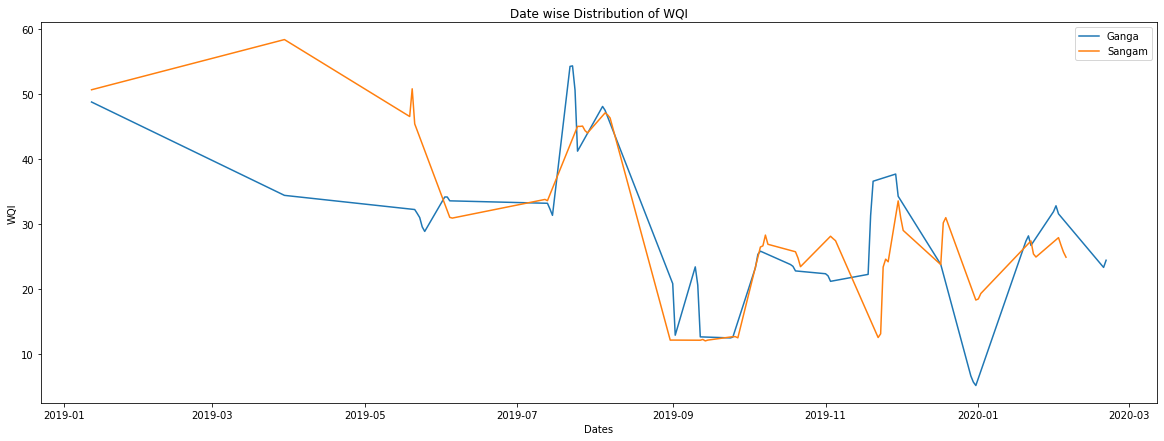

In [15]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xlabel('Dates')
plt.ylabel('WQI')
plt.title('Date wise Distribution of WQI')
ax = data1.plot(ax=ax)
data2.plot(ax=ax)
fig.savefig('Graphs/DayWiseGraph.png')

In [16]:
#Month Wise
import matplotlib
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,7))
gangaBar = ax.bar(gangaDataMonth.keys(), gangaDataMonth.values(), 0.50, label='Ganga')
sangamBar = ax.bar(sangamDataMonth.keys(), sangamDataMonth.values(), 0.25, label = 'Sangam')
ax.set_ylabel('WQI')
ax.set_xlabel('Month-Year')
ax.set_title('Month wise Distribution of WQI')
ax.legend()
# plt.show()
fig.savefig('Graphs/monthlyGraph.png')